In [79]:
%load_ext autoreload
%autoreload 2

In [144]:
import itertools as it

import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader

from spread_classification.utils import collate, GraphsDataset
from src.training_utils import get_graph_loaders, get_train_val_indices
from spread_classification.preprocessing import FEATURES_LIST

In [76]:
dataset_path = '../data/graphs_features'

In [86]:
dataset = GraphsDataset(dataset_path)

In [92]:
loaders = get_graph_loaders(
    dataset_path,
    8,
    4,
    2,
    dataset_size=None,
    n_splits=5,
    device=None,
)

In [94]:
train_loader, _ = loaders[0]

In [121]:
features = ['nb_followers', 'nb_following', 'diff_time']

In [159]:
nodes = (
    tweet 
    for graphs, labels in train_loader
    for tweet in zip(*[graphs.ndata[key].numpy() for key in FEATURES_LIST])
)

In [160]:
def stats(values):
    return {
        fun.__name__: fun(values) 
        for fun in [np.mean, np.std, np.median]
    }

values = zip(*nodes)
data_stats = {
    feature: stats(values) 
    for feature, values in zip(FEATURES_LIST, values)
}

In [161]:
data_stats

{'type': {'mean': 0.08084368515307427,
  'std': 0.2725949077366356,
  'median': 0.0},
 'nb_followers': {'mean': 10562.050399385997,
  'std': 391214.8338535482,
  'median': 746.0},
 'nb_following': {'mean': 3385.672276073794,
  'std': 9492.77240299535,
  'median': 990.0},
 'diff_time': {'mean': 12.359369, 'std': 99.8814, 'median': 1.4755555},
 'local_hour': {'mean': 13.741749339094346,
  'std': 6.625425831859523,
  'median': 14.0},
 'device': {'mean': 0.9162284317348418,
  'std': 0.9932276602241434,
  'median': 1.0}}

In [73]:
shuffled = dataset.get_subsets([len(dataset)])[0]

In [69]:
generic_loader = DataLoader(
    shuffled,
    batch_size=8,
    shuffle=False,
    drop_last=False,
    num_workers=2,
    pin_memory=False,
    collate_fn=collate,
)

In [26]:
len(nodes)

44988

In [34]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None, *, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*.  The return value is a tuple
    (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*, [*patches0*,
    *patches1*,...]) if the input contains multiple data.  See the
    documentation of the *weights* parameter to draw a histogram of
    already-binned data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2-D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported at present.
    
    Parameters
    ----------
    x : (n,) array or seque

(array([4.4568e+04, 1.3600e+02, 6.0000e+01, 3.0000e+00, 1.5900e+02,
        4.3000e+01, 0.0000e+00, 2.0000e+00, 0.0000e+00, 1.7000e+01]),
 array([   0.     ,  319.76355,  639.5271 ,  959.29065, 1279.0542 ,
        1598.8177 , 1918.5813 , 2238.3447 , 2558.1084 , 2877.872  ,
        3197.6355 ], dtype=float32),
 <a list of 10 Patch objects>)

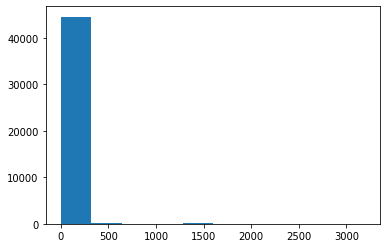

In [47]:
plt.hist(diff_time)

In [38]:
standard_followers = (np.array(nb_followers) - np.mean(nb_followers)) / np.std(nb_followers)

In [41]:
standard_following = (np.array(nb_following) - np.mean(nb_following)) / np.std(nb_following)

In [42]:
standard_difftime = (np.array(diff_time) - np.mean(diff_time)) / np.std(diff_time)

In [52]:
medianed_difftime = np.array(diff_time) - np.median(diff_time)

In [58]:
np.median(standard_difftime)

-0.12358391

In [49]:
diff_time[:100]

(0.0,
 0.26222223,
 0.38944444,
 0.4,
 0.49888888,
 8.453055,
 0.0,
 0.055277776,
 0.10722222,
 0.70111114,
 0.7133333,
 0.8411111,
 2.0319445,
 2.5811112,
 2.8016667,
 3.6088889,
 4.1319447,
 4.646111,
 11.879723,
 12.105556,
 18.515556,
 18.572779,
 20.911112,
 0.0,
 3.3863888,
 3.393889,
 3.4027777,
 3.4444444,
 3.4830556,
 3.5225,
 3.7172222,
 3.7830555,
 0.0,
 0.035833333,
 0.052222222,
 0.054444443,
 0.06666667,
 0.12083333,
 0.13388889,
 0.17583333,
 0.21611111,
 0.23055555,
 0.36805555,
 0.43305555,
 1.6922222,
 1.8169445,
 1.8758334,
 3.3319445,
 0.0,
 0.04,
 0.17861111,
 0.30027777,
 0.30555555,
 0.51361114,
 1.0880556,
 1.4716667,
 3.5541666,
 6.957778,
 6.973889,
 7.0208335,
 7.0975,
 7.2025,
 7.21,
 8.091945,
 9.529445,
 11.671945,
 11.69,
 11.900278,
 11.972222,
 12.182222,
 13.082778,
 13.289722,
 14.380555,
 14.424723,
 14.4275,
 14.533055,
 18.195833,
 18.235277,
 18.23889,
 19.86,
 19.875,
 19.999722,
 20.01,
 20.019444,
 20.041666,
 20.451666,
 20.915277,
 26.279444,